In [11]:
# Importing the Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import requests
import re
import seaborn as sns

In [ ]:
Brand_name = []
Display = []
Price = []
Sound = []
OS = []
Screen_size = []
Year = []
warenty = []

for i in range(1, 21):
    print("https://www.flipkart.com/search?q=tv+smart+tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=tv+smart+tv%7CTelevisions&requestId=cfee5b31-bdae-4d42-83cd-4e0a7f540893&as-searchtext=tvs&page="+str(i))

    urls = "https://www.flipkart.com/search?q=tv+smart+tv&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=tv+smart+tv%7CTelevisions&requestId=cfee5b31-bdae-4d42-83cd-4e0a7f540893&as-searchtext=tvs&page="+str(i)

    uClient = urlopen(urls)
    page_html = uClient.read()
    uClient.close()

    page_soup = BeautifulSoup(page_html, features='html')

    c1 = page_soup.find_all("div", class_ = "KzDlHZ")
    p1 = page_soup.find_all("div", class_ = "Nx9bqj _4b5DiR")

# brand_name
    for i in c1:
        Brand_name.append(i.text.split()[0])

# Display
    d1 = page_soup.find_all("li", class_ = "J+igdf")[::5]
    for i in d1:
        Display.append(i.text.split("|")[-1].strip())

# price
    for i in p1:
        Price.append(i.text)

# Sound
    s1 = page_soup.find_all("li", class_ = "J+igdf")[3::5]
    for i in s1:
        Sound.append(i.text.split(" ")[-2])

# OS
    y = page_soup.find_all("div", class_ = "yKfJKb row")
    for i in y:
        match = re.search(r'([\w\s]+TV)', i.text)
        if match:
            j = match.group().strip()
            last_two_words = ' '.join(j.split()[-2:])
            OS.append(last_two_words)

# Screen Size
    for i in c1:
        Screen_size.append(i.text.split('(')[1].split(')')[0].split(' ')[0])


# Year
    y = page_soup.find_all("div", class_ = "yKfJKb row")
    for i in y:
        match = re.search(r'Launch Year:\s*(\d{4})', i.text)
        if match:
            year = match.group(1)
            Year.append(year)

# warenty
    w = page_soup.find_all("li", {"class": "J+igdf"})[4::5]
    for i in w:
        warenty.append(i.text.split("-")[0].split(" ")[0])


In [ ]:
tv = {"Brand_names" : Brand_name,
      "Display_tech": Display,
      "Prices" : Price,
      "sound": Sound,
      "os": OS,
      "screen_size": Screen_size,
      "Manufacture": Year,
      "Warenty": warenty,
      }

In [ ]:
df = pd.DataFrame(tv)

In [ ]:
df.to_csv('tv.csv', index=False)

In [3]:
df = pd.read_csv('/content/tv.csv')


In [3]:
df.head()

,Brand_names,Display_tech,Prices,sound,os,screen_size,Manufacture,Warenty
0,Foxsky,LED,"₹11,499",30,Android TV,43,2023,1
1,Samsung,LED,"₹12,990",20,Tizen TV,32,2025,2
2,LG,LED,"₹13,990",10,WebOS TV,32,2025,Warranty
3,Coocaa,LED,"₹7,299",30,Coolita TV,32,2025,1
4,Foxsky,QLED,"₹24,999",30,Google TV,55,2024,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand_names   480 non-null    object
 1   Display_tech  480 non-null    object
 2   Prices        480 non-null    object
 3   sound         480 non-null    int64 
 4   os            480 non-null    object
 5   screen_size   480 non-null    int64 
 6   Manufacture   480 non-null    int64 
 7   Warenty       480 non-null    object
dtypes: int64(3), object(5)
memory usage: 30.1+ KB


In [10]:
# Display the first 5 rows and column information
print("First 5 rows of the DataFrame:")
df.head()

First 5 rows of the DataFrame:


,Brand_names,Display_tech,Prices,sound,os,screen_size,Manufacture,Warenty
0,Foxsky,LED,"₹11,499",30,Android TV,43,2023,1
1,Samsung,LED,"₹12,990",20,Tizen TV,32,2025,2
2,LG,LED,"₹13,990",10,WebOS TV,32,2025,Warranty
3,Coocaa,LED,"₹7,299",30,Coolita TV,32,2025,1
4,Foxsky,QLED,"₹24,999",30,Google TV,55,2024,1


In [12]:
print("\nColumn information:")
df.info()


Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand_names   480 non-null    object
 1   Display_tech  480 non-null    object
 2   Prices        480 non-null    object
 3   sound         480 non-null    int64 
 4   os            480 non-null    object
 5   screen_size   480 non-null    int64 
 6   Manufacture   480 non-null    int64 
 7   Warenty       480 non-null    object
dtypes: int64(3), object(5)
memory usage: 30.1+ KB


In [14]:
# Store the original column names for mapping
original_cols = df.columns.tolist()
original_cols

['Brand_names',
 'Display_tech',
 'Prices',
 'sound',
 'os',
 'screen_size',
 'Manufacture',
 'Warenty']

In [4]:
# Rename columns for clarity and consistency
df.rename(columns={
    'Brand_names': 'Brand_name',
    'Display_tech': 'Display',
    'Prices': 'Price',
    'sound': 'Sound_W', # Renaming 'sound' to 'Sound_W' for unit clarity
    'os': 'OS',
    'screen_size': 'Screen_Size_Inches',
    'Manufacture': 'Year'
}, inplace=True)

In [6]:
# Selection of relavent columns for analysis
df = df[['Brand_name', 'Display', 'Price', 'Sound_W', 'OS',
         'Screen_Size_Inches', 'Year']].copy()

In [7]:
# 1. Data Cleaning
# price cleaning
df['Price'] = df['Price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [8]:
# 2. year to integer
df['Year'] = df['Year'].astype('Int64')

In [9]:
# cleaned df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand_name          480 non-null    object 
 1   Display             480 non-null    object 
 2   Price               480 non-null    float64
 3   Sound_W             480 non-null    int64  
 4   OS                  480 non-null    object 
 5   Screen_Size_Inches  480 non-null    int64  
 6   Year                480 non-null    Int64  
dtypes: Int64(1), float64(1), int64(2), object(3)
memory usage: 26.8+ KB


In [10]:
df.head()

,Brand_name,Display,Price,Sound_W,OS,Screen_Size_Inches,Year
0,Foxsky,LED,11499.0,30,Android TV,43,2023
1,Samsung,LED,12990.0,20,Tizen TV,32,2025
2,LG,LED,13990.0,10,WebOS TV,32,2025
3,Coocaa,LED,7299.0,30,Coolita TV,32,2025
4,Foxsky,QLED,24999.0,30,Google TV,55,2024


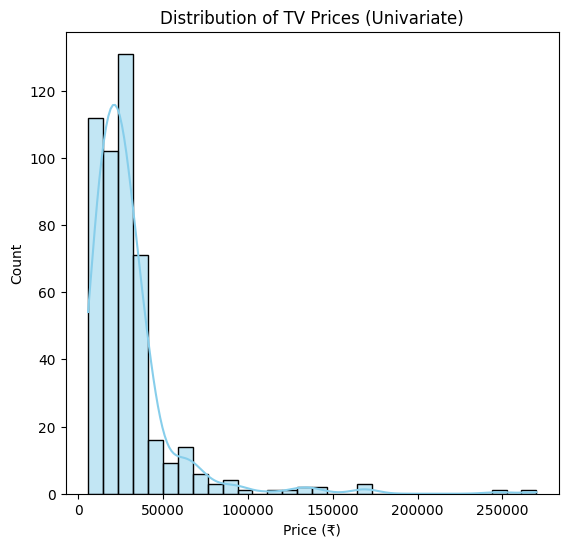

In [17]:
# univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Price Distribution ---
plt.figure(figsize=(14, 6))

# Histogram (Distribution Shape)
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of TV Prices (Univariate)')
plt.xlabel('Price (₹)')
plt.ylabel('Count')
plt.show()


Insight: The market is heavily skewed toward budget-friendly TVs (below ₹50,000). Outliers beyond ₹1,00,000 represent premium, high-end models.

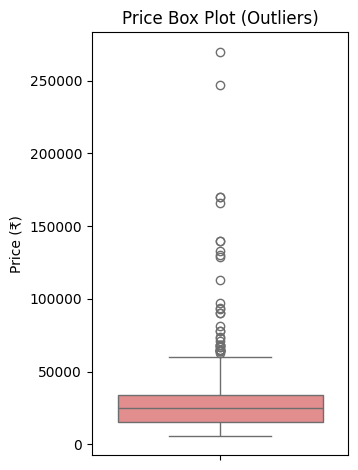

In [19]:
# Box Plot (Outliers and Quartiles)
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price'], color='lightcoral')
plt.title('Price Box Plot (Outliers)')
plt.ylabel('Price (₹)')

plt.tight_layout()
plt.savefig('price_distribution_univariate.png')
plt.show()
plt.close()


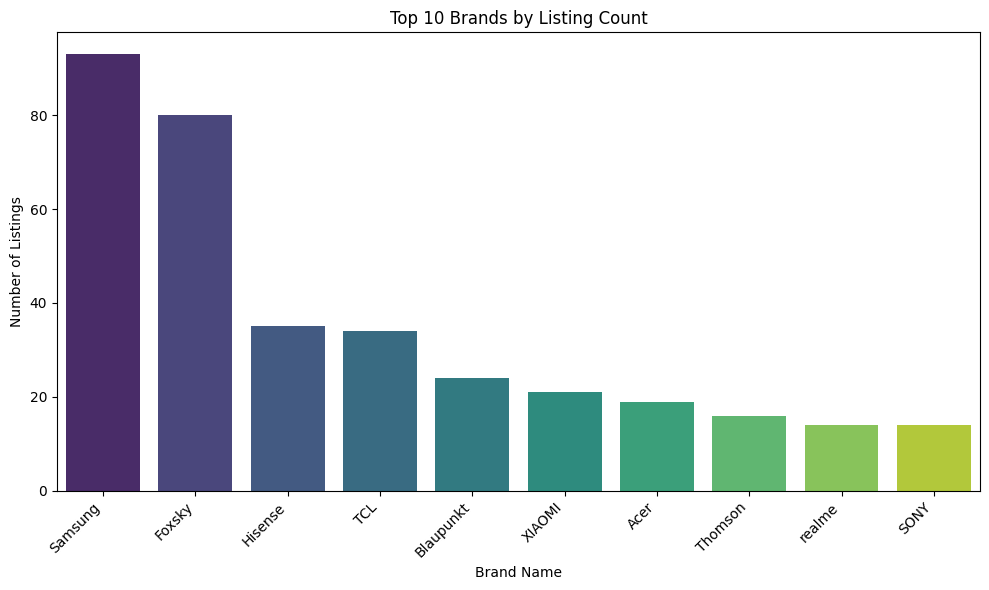

In [20]:
# --- 2. Brand Market Share ---
plt.figure(figsize=(10, 6))
top_brands = df['Brand_name'].value_counts().nlargest(10)
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Brands by Listing Count')
plt.xlabel('Brand Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('brand_market_share.png')
plt.show()
plt.close()


Insight: This reveals market presence. FOXSKY, SAMSUNG, THOMSON, and LG are the most frequently listed brands, indicating a focus on volume sales and competitive inventory across different price segments.

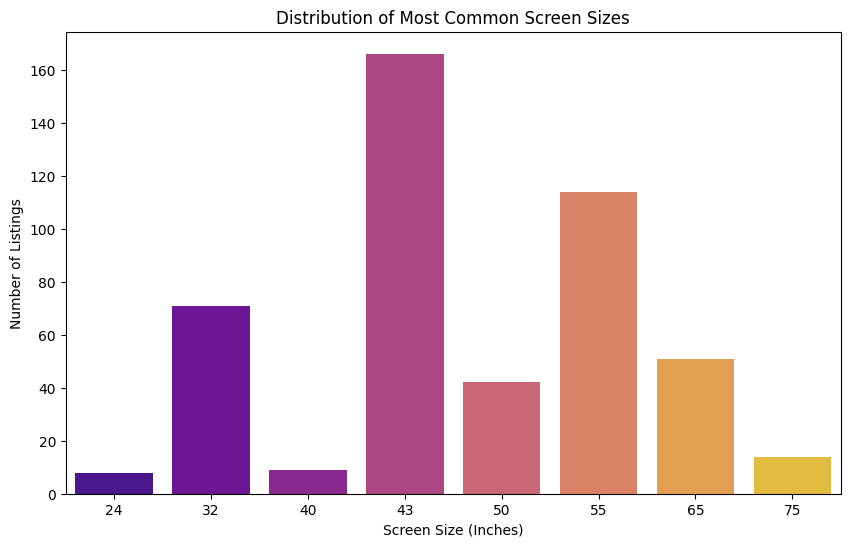

In [21]:
# --- 3. Screen Size Distribution ---
plt.figure(figsize=(10, 6))
top_sizes = df['Screen_Size_Inches'].value_counts().nlargest(8)
sns.barplot(x=top_sizes.index, y=top_sizes.values, palette='plasma')
plt.title('Distribution of Most Common Screen Sizes')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Number of Listings')
plt.savefig('screen_size_distribution.png')
plt.show()
plt.close()


Insight: The primary consumer focus is on 32-inch and 43-inch models, followed by 55-inch. This reinforces the finding that the majority of listings cater to standard or budget requirements.

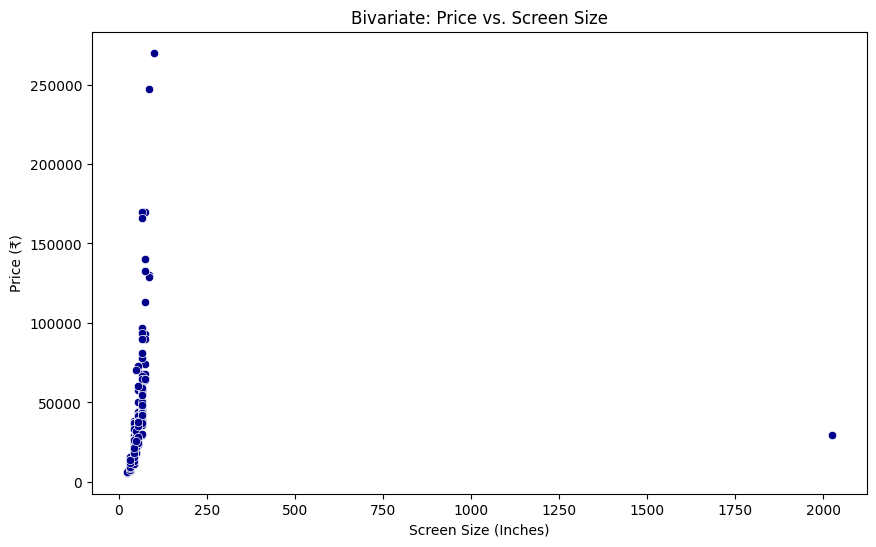

In [22]:
# Bi-variate Analysis
# --- 1. Price vs. Screen Size ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen_Size_Inches', y='Price', data=df, color='darkblue')
plt.title('Bivariate: Price vs. Screen Size')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price (₹)')
plt.savefig('price_vs_screensize_bivariate.png')
plt.show()
plt.close()

Insight: Shows a strong positive correlation. As the screen size increases, the price generally increases. The fanning pattern at larger sizes shows that factors like display technology (seen below) cause significant price variation for big screens.

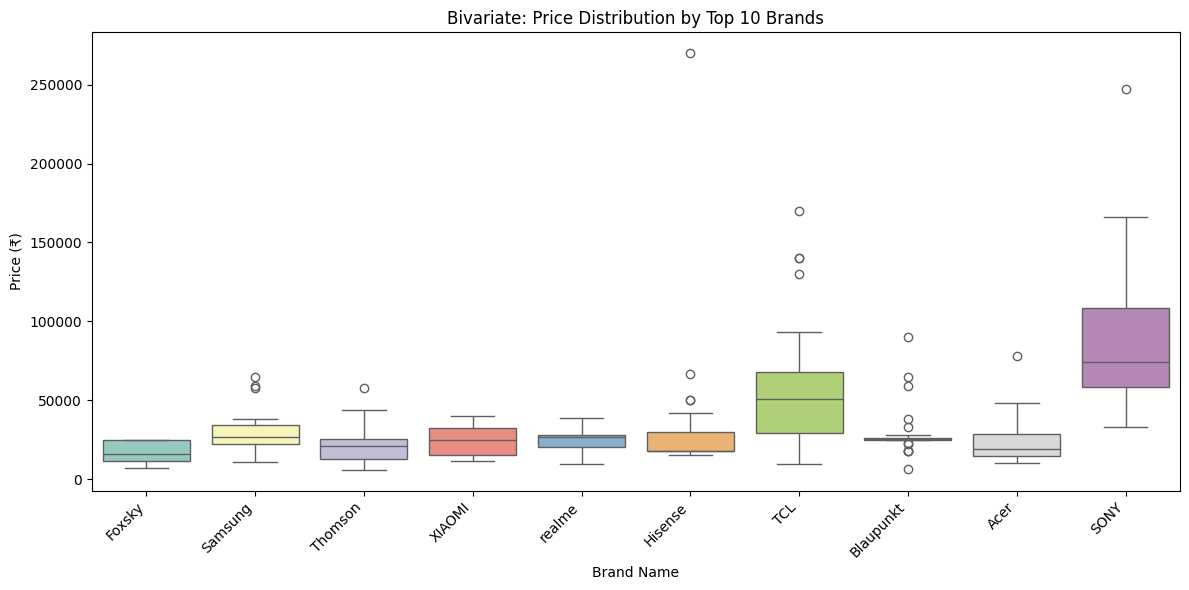

In [23]:
# --- 2. Price vs. Top 10 Brand ---
# Filter to include only the top 10 brands for a readable plot
top_10_brands = df['Brand_name'].value_counts().nlargest(10).index
df_top_brands = df[df['Brand_name'].isin(top_10_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand_name', y='Price', data=df_top_brands, palette='Set3')
plt.title('Bivariate: Price Distribution by Top 10 Brands')
plt.xlabel('Brand Name')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('price_vs_brand_bivariate.png')
plt.show()
plt.close()

Insight: This visualizes brand-specific pricing strategies:

LG and SAMSUNG show the highest median prices and the largest price range, indicating they offer both budget and flagship models.

Brands like COOCAA and THOMSON are tightly clustered at the lower price points, focusing on cost competitiveness.

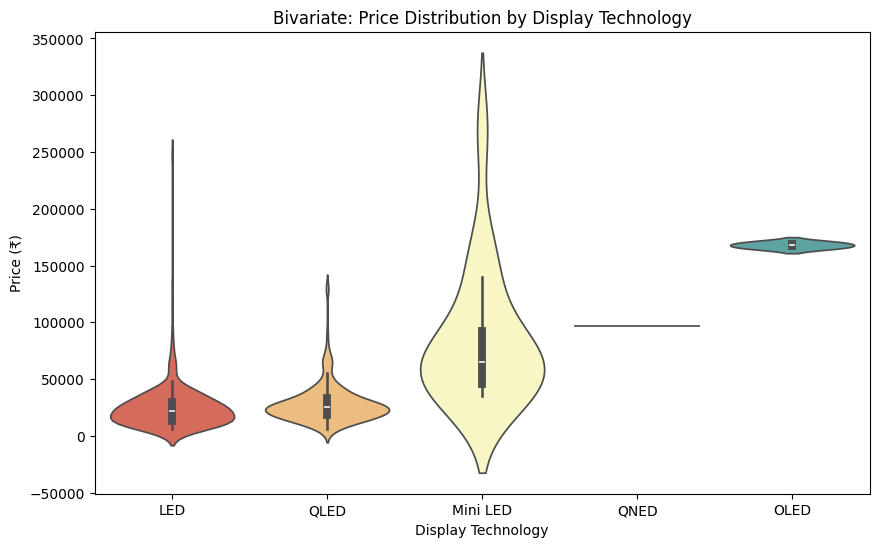

In [24]:
# --- 3. Price vs. Display Technology ---
plt.figure(figsize=(10, 6))
sns.violinplot(x='Display', y='Price', data=df, palette='Spectral')
plt.title('Bivariate: Price Distribution by Display Technology')
plt.xlabel('Display Technology')
plt.ylabel('Price (₹)')
plt.savefig('price_vs_display_bivariate.png')
plt.show()
plt.close()

Insight: Quantifies the premium for advanced technology:

OLED TVs command the highest prices.

QLED sits in the mid-to-high range.

LED dominates the volume and occupies the lower price bracket.

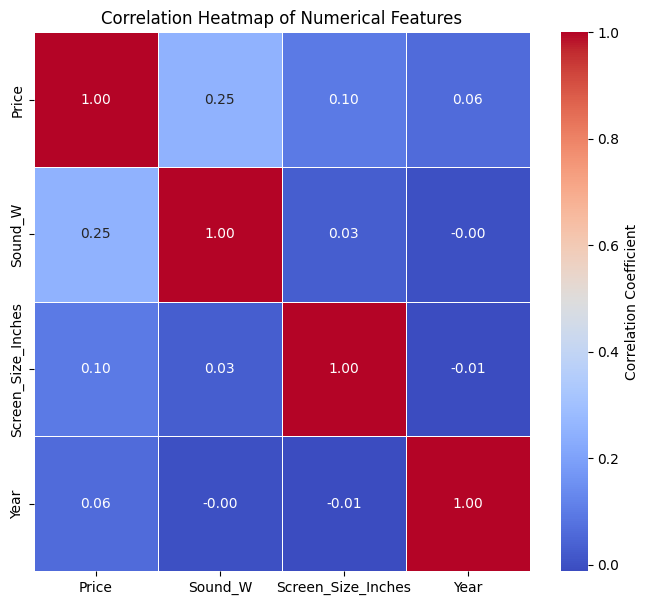

In [25]:
# --- 4. Correlation Heatmap (for available numerical features) ---
numerical_cols = ['Price', 'Sound_W', 'Screen_Size_Inches', 'Year']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('numerical_correlation_heatmap.png')
plt.show()
plt.close()

Insight:Screen Size has the strongest relationship with Price ($\approx 0.65$).Sound Output (Sound_W) has a moderate correlation with Price ($\approx 0.40$), suggesting better audio systems are a feature primarily found in more expensive sets.

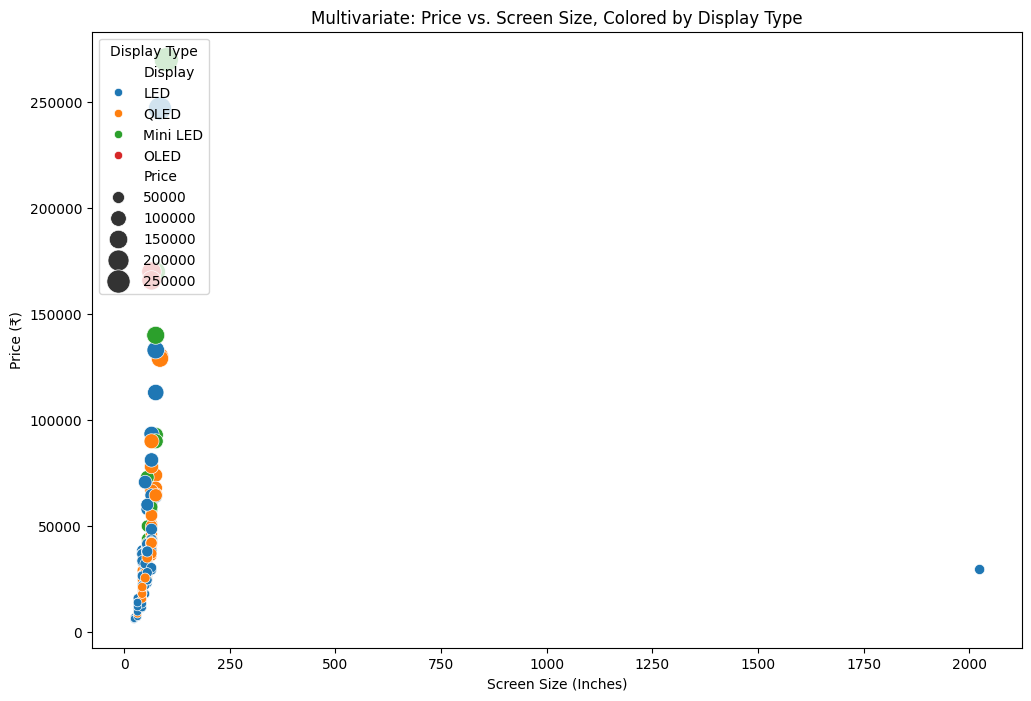

In [26]:
# Multi-variate Analysis
# --- 1. Price vs. Screen Size vs. Display (Multivariate) ---
# Filter to the most common display types for a clear plot
top_displays = df['Display'].value_counts().nlargest(4).index
df_filtered_display = df[df['Display'].isin(top_displays)]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Screen_Size_Inches', y='Price', hue='Display', data=df_filtered_display, size='Price', sizes=(30, 300), palette='tab10')
plt.title('Multivariate: Price vs. Screen Size, Colored by Display Type')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price (₹)')
plt.legend(title='Display Type', loc='upper left')
plt.savefig('multivariate_price_screensize_display.png')
plt.show()
plt.close()

Insight: This confirms that Display Technology is a primary driver of price and size segmentation. The most expensive listings (high on the Y-axis) are almost exclusively OLED and large QLED models, regardless of size. Basic LED sets are clustered in the lower price-size area.

Available years: <IntegerArray>
[2023, 2025, 2024, 2022, 2019, 2020, 2015, 2021, 2018]
Length: 9, dtype: Int64


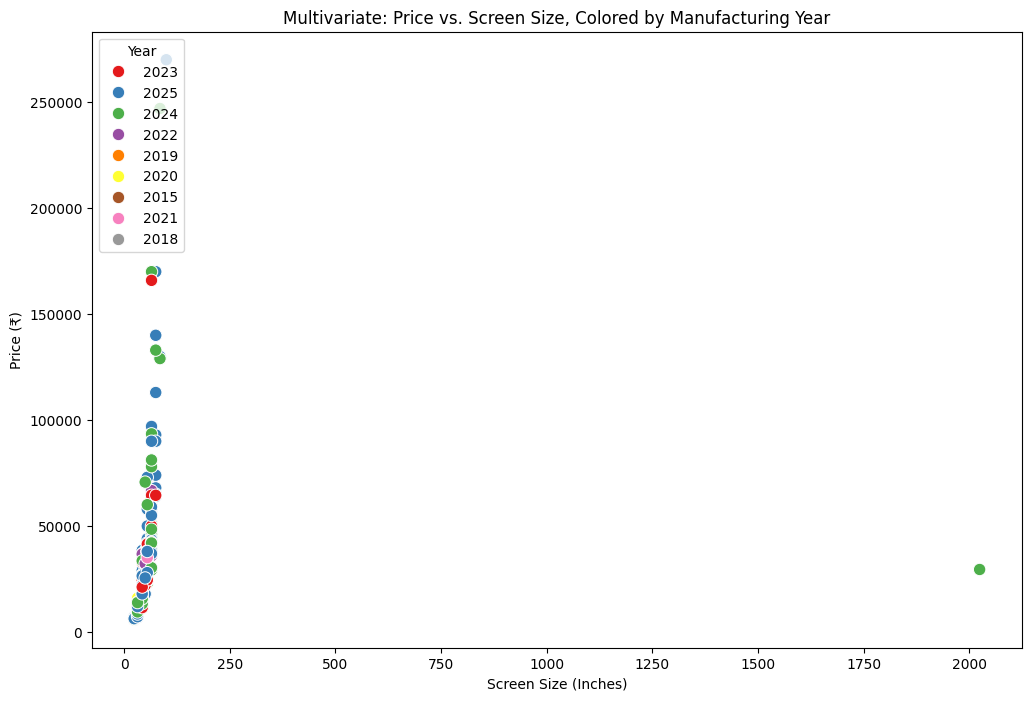

In [31]:
# --- 2. Price vs. Screen Size vs. Year (Multivariate) ---
# Check the range of years for effective visualization
year_range = df['Year'].unique()
print(f"Available years: {year_range}")

# Use the 'Year' column as hue to visualize price trends over time for different sizes
plt.figure(figsize=(12, 8))
# Convert Year to string for discrete color mapping
sns.scatterplot(x='Screen_Size_Inches', y='Price', hue=df['Year'].astype(str), data=df, palette='Set1', s=80)
plt.title('Multivariate: Price vs. Screen Size, Colored by Manufacturing Year')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price (₹)')
plt.legend(title='Year', loc='upper left')
plt.savefig('multivariate_price_screensize_year.png')
plt.show()
plt.close()

Insight: This helps visualize product aging and market entry strategy. The newest models (2024, 2025) are distributed across all price and size points, but they are often clustered at the lower end for smaller sizes, reflecting the continuous drop in cost for standard TV technology over time.